Make Jupyter cells as wide as possible

In [564]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Import Python modules

In [565]:
import sys
import pandas as pd
import os
import platform
print(platform.python_version())

3.5.4


# Define directory 
Set the directory to read motion files from.<br>
This directory should contain a set of sub-directories where the name matches the motion label.<br>
Each sub-directory contains a set of comma-separated (.csv) files each containing a single captured motion.

In [566]:
rootDir = 'V:/Dropbox/ShareIrene/ScienceFair/Experiments/DataFiles'
closeMotions = '20180303_2333'
distinctMotions = '20180217_2314'

dataName = closeMotions #dataName is used later to save a png of the plots
dataRootDir = os.path.join(rootDir, dataName)

# Process csv file functions

The main function 'read_csv_files' loops through the sub-directories of the root and reads the .csv files.<br>
It calls the functions 'add_csv_df' and 'prepare_csv_df' to convert the motion data into a single DataFrame that can be processed by the SKLearn toolkit.

### read_csv_files function
This procedure starts from a root directory and loops over each sub-directory.<br>
Each sub-directory represents one class of motions. The directory name is the label for this motion.<br>
Each sub-directory contains a set of .csv files. Each .csv file is one captured motion.<br>
It returns a DataFrame where each motion is one row.

In [567]:
# motions_dict = {}
def read_csv_files(rootDir):
    df_list = []
    for dirName, subdirList, fileList in os.walk(rootDir):
        if dirName == rootDir:
            motionName = ''
        else:
            head, motionName = os.path.split(dirName) #split removes the directory separator, so we don't need to do this by replacing '\' or '/'
        if len(motionName) > 0:
#             print('Motion: %s' % motionName)
            for fname in fileList:
                filename, file_extension = os.path.splitext(fname)
                #Only consider csv files
                if file_extension.lower() == '.csv':   
                    csv_file = os.path.join(dirName, fname)
                    fileSize = os.path.getsize(csv_file)
                    dataName = fname.replace('.CSV', '')
#                     print('\t%s, size = %i, data = %s' % (fname, fileSize, dataName))
                    if (fileSize > 0):
                        df = pd.read_csv(csv_file)
                        if len(df.index) >= 48:
                            df = df.head(48)
                            if not df.isnull().values.any():
                                add_csv_df(df_list, df, dataName, motionName)
                            else:
                                print('Found null values')
                        else :
                            print('Less than 49 samples: ' + fname)
    all_df = pd.concat(df_list)
    all_df.columns.names = ['sample','qt']
    if all_df.isnull().values.any():
        print ("NULL")
    return all_df

### add_csv_df function
Adds a DataFrame representing a single .csv file to the list 'df_list'.<br>

In [568]:
def add_csv_df(df_list, csv_df, dataName, motion):
    df = prepare_csv_df(csv_df, dataName, motion)
    if df.isnull().values.any():
        print("Null values")
    df_list.append(prepare_csv_df(csv_df, dataName, motion))
#     return none

### prepare_csv_df function
Takes the raw csv data, extracts the quaternions, stacks the sampled data in one column and then transposes it to a single row.

In [569]:
def prepare_csv_df(csv_df, dataName, motion):
    #1. Extract quaternion columns from csv_df
    df = csv_df[['quat_w','quat_x','quat_y','quat_z']]
    #2. Transpose (stack)
    df = pd.DataFrame(df.stack())
    #3. Name data column (multi-index)
    columns = [(motion,dataName)]
    df.columns = pd.MultiIndex.from_tuples(columns)
    #4. Transpose
    df = df.T
    df.index.names = ['motion', 'dataName']
    return df

# Read the motions from file

In [570]:
all_df = read_csv_files(dataRootDir)
all_df.head(10)

sample                        0                               1           \
qt                        quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion          dataName                                                   
OnTime_FsSeFtFs DATA0     0.2159 -0.1909  0.6455  0.7073  0.2186 -0.1866   
                DATA1     0.0765 -0.0598  0.6913  0.7160  0.1064 -0.0872   
                DATA2     0.0799 -0.0660  0.6981  0.7084  0.1068 -0.0920   
                DATA3     0.0663 -0.0283  0.6995  0.7109  0.0810 -0.0386   
                DATA4     0.0631  0.0018  0.7053  0.7061  0.0823 -0.0227   
                DATA5     0.0640 -0.0341  0.7198  0.6904  0.0956 -0.0661   
                DATA6     0.1353 -0.1012  0.7090  0.6846  0.1913 -0.1217   
                DATA7     0.0873 -0.0438  0.6823  0.7245  0.1171 -0.0506   
                DATA8     0.1282 -0.0364  0.6573  0.7418  0.1616 -0.0530   
                DATA9     0.0563 -0.0010  0.6661  0.7437  0.0926 -0.0150   

sample                                        2            ...        45  \
qt                        quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion          dataName                                   ...             
OnTime_FsSeFtFs DATA0     0.6485  0.7048  0.2336 -0.1915   ...    0.5788   
                DATA1     0.6896  0.7111  0.1495 -0.1292   ...    0.6743   
                DATA2     0.6959  0.7042  0.1456 -0.1204   ...    0.6918   
                DATA3     0.6954  0.7130  0.0969 -0.0562   ...    0.6852   
                DATA4     0.7133  0.6957  0.1163 -0.0538   ...    0.6752   
                DATA5     0.7256  0.6782  0.1364 -0.0982   ...    0.7126   
                DATA6     0.6943  0.6830  0.2399 -0.1313   ...    0.6852   
                DATA7     0.6722  0.7293  0.1505 -0.0670   ...    0.6548   
                DATA8     0.6533  0.7377  0.2040 -0.0799   ...    0.6391   
                DATA9     0.6638  0.7421  0.1382 -0.0353   ...    0.6063   

sample                                46                              47  \
qt                        quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion          dataName                                                   
OnTime_FsSeFtFs DATA0     0.7738  0.0756 -0.2291  0.5931  0.7681  0.0759   
                DATA1     0.7360  0.0498 -0.0273  0.6795  0.7315  0.0539   
                DATA2     0.7203  0.0428 -0.0236  0.6945  0.7178  0.0444   
                DATA3     0.7245  0.0649 -0.0271  0.6901  0.7203  0.0660   
                DATA4     0.7337  0.0593 -0.0438  0.6813  0.7283  0.0594   
                DATA5     0.6979  0.0362 -0.0372  0.7203  0.6917  0.0369   
                DATA6     0.7216  0.0807 -0.0557  0.6838  0.7230  0.0825   
                DATA7     0.7476  0.0834 -0.0687  0.6557  0.7473  0.0845   
                DATA8     0.7668  0.0138 -0.0464  0.6447  0.7629  0.0164   
                DATA9     0.7874  0.0302 -0.0958  0.6157  0.7815  0.0348   

sample                                            
qt                        quat_x  quat_y  quat_z  
motion          dataName                          
OnTime_FsSeFtFs DATA0    -0.2038  0.6068  0.7645  
                DATA1    -0.0223  0.6840  0.7272  
                DATA2    -0.0171  0.6966  0.7159  
                DATA3    -0.0172  0.6928  0.7179  
                DATA4    -0.0373  0.6862  0.7240  
                DATA5    -0.0252  0.7245  0.6877  
                DATA6    -0.0541  0.6830  0.7238  
                DATA7    -0.0640  0.6567  0.7466  
                DATA8    -0.0363  0.6500  0.7589  
                DATA9    -0.0865  0.6276  0.7729  

[10 rows x 192 columns]

# Prepare machine learning data
Convert the motions into the X (input) matrix and Y (output) vector

In [571]:
X = all_df
X.head()

sample                        0                               1           \
qt                        quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion          dataName                                                   
OnTime_FsSeFtFs DATA0     0.2159 -0.1909  0.6455  0.7073  0.2186 -0.1866   
                DATA1     0.0765 -0.0598  0.6913  0.7160  0.1064 -0.0872   
                DATA2     0.0799 -0.0660  0.6981  0.7084  0.1068 -0.0920   
                DATA3     0.0663 -0.0283  0.6995  0.7109  0.0810 -0.0386   
                DATA4     0.0631  0.0018  0.7053  0.7061  0.0823 -0.0227   

sample                                        2            ...        45  \
qt                        quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion          dataName                                   ...             
OnTime_FsSeFtFs DATA0     0.6485  0.7048  0.2336 -0.1915   ...    0.5788   
                DATA1     0.6896  0.7111  0.1495 -0.1292   ...    0.6743   
                DATA2     0.6959  0.7042  0.1456 -0.1204   ...    0.6918   
                DATA3     0.6954  0.7130  0.0969 -0.0562   ...    0.6852   
                DATA4     0.7133  0.6957  0.1163 -0.0538   ...    0.6752   

sample                                46                              47  \
qt                        quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion          dataName                                                   
OnTime_FsSeFtFs DATA0     0.7738  0.0756 -0.2291  0.5931  0.7681  0.0759   
                DATA1     0.7360  0.0498 -0.0273  0.6795  0.7315  0.0539   
                DATA2     0.7203  0.0428 -0.0236  0.6945  0.7178  0.0444   
                DATA3     0.7245  0.0649 -0.0271  0.6901  0.7203  0.0660   
                DATA4     0.7337  0.0593 -0.0438  0.6813  0.7283  0.0594   

sample                                            
qt                        quat_x  quat_y  quat_z  
motion          dataName                          
OnTime_FsSeFtFs DATA0    -0.2038  0.6068  0.7645  
                DATA1    -0.0223  0.6840  0.7272  
                DATA2    -0.0171  0.6966  0.7159  
                DATA3    -0.0172  0.6928  0.7179  
                DATA4    -0.0373  0.6862  0.7240  

[5 rows x 192 columns]

In [572]:
Y = all_df.reset_index()['motion']
Y.head()

0    OnTime_FsSeFtFs
1    OnTime_FsSeFtFs
2    OnTime_FsSeFtFs
3    OnTime_FsSeFtFs
4    OnTime_FsSeFtFs
Name: motion, dtype: object

Check for any 'null' values. Nulls cause trouble in the learning algorithm and need to be avoided.

In [573]:
X.isnull().values.any()

False

In [574]:
Y.isnull().values.any()

False

# Learn
1. Label encoding
2. Split data set into a train and test set
3. Train GaussianNB model and test
4. Train RandomForrest model and test

## Label Encoding
We need to map the textual values of the predicted labels to a number.

In [575]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y)
le.classes_

array(['Early_FsSeFtFs', 'Late_FsSeFtFs', 'OnTime_FsSeFtFs',
       'Slow_FsSeFtFs'], dtype=object)

## Split into a train and test set

In [576]:
# split the data to training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=42, stratify=y_encoded)

## GaussianNB

In [577]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbModel = gnb.fit(X_train, y_train)
y_pred = gnbModel.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 0


In [578]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = gnbModel.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      0.43      0.60         7
          2       0.67      1.00      0.80         8
          3       1.00      1.00      1.00         7

avg / total       0.91      0.87      0.85        30



## Detailed report on test data
For each item in the test set, get the detailed (probability-based) prediction and compare with actual data.

In [579]:
y_prediction_proba = gnbModel.predict_proba(X_test)
df = pd.DataFrame(y_prediction_proba, columns = le.classes_)
df['correct']=(y_prediction == y_test)
df['predicted']=le.inverse_transform(y_prediction)
df['actual']=le.inverse_transform(y_test)
df

,Early_FsSeFtFs,Late_FsSeFtFs,OnTime_FsSeFtFs,Slow_FsSeFtFs,correct,predicted,actual
0,1.000000e+00,0.000000e+00,1.379398e-125,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs
1,1.000000e+00,0.000000e+00,1.863968e-95,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs
2,1.000000e+00,0.000000e+00,1.536508e-168,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs
3,1.000000e+00,0.000000e+00,4.530343e-46,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs
4,0.000000e+00,0.000000e+00,1.000000e+00,0.0,True,OnTime_FsSeFtFs,OnTime_FsSeFtFs
5,0.000000e+00,0.000000e+00,0.000000e+00,1.0,True,Slow_FsSeFtFs,Slow_FsSeFtFs
6,0.000000e+00,1.349469e-02,9.865053e-01,0.0,False,OnTime_FsSeFtFs,Late_FsSeFtFs
7,0.000000e+00,1.000000e+00,0.000000e+00,0.0,True,Late_FsSeFtFs,Late_FsSeFtFs
8,0.000000e+00,0.000000e+00,0.000000e+00,1.0,True,Slow_FsSeFtFs,Slow_FsSeFtFs
9,1.000000e+00,0.000000e+00,3.051290e-164,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs


Plot probability data in histogram

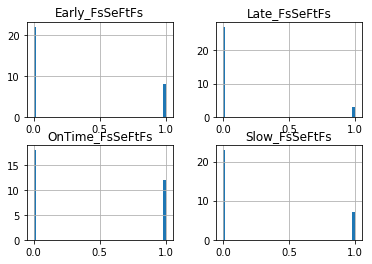

In [580]:
df2 = df.drop(['correct', 'predicted', 'actual'], axis=1)
df2.hist(bins=50)
plt.show()

## RandomForrest

In [581]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdfModel = rdf.fit(X_train, y_train)
y_pred = rdfModel.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 0


In [582]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = rdfModel.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      0.71      0.83         7
          2       0.80      1.00      0.89         8
          3       1.00      1.00      1.00         7

avg / total       0.95      0.93      0.93        30



In [583]:
y_prediction_proba = rdfModel.predict_proba(X_test)
df = pd.DataFrame(y_prediction_proba, columns = le.classes_)
df['correct']=(y_prediction == y_test)
df['predicted']=le.inverse_transform(y_prediction)
df['actual']=le.inverse_transform(y_test)
df

,Early_FsSeFtFs,Late_FsSeFtFs,OnTime_FsSeFtFs,Slow_FsSeFtFs,correct,predicted,actual
0,0.9,0.0,0.1,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs
1,0.9,0.0,0.1,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs
2,0.9,0.0,0.1,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs
3,0.7,0.0,0.3,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs
4,0.0,0.0,1.0,0.0,True,OnTime_FsSeFtFs,OnTime_FsSeFtFs
5,0.0,0.0,0.0,1.0,True,Slow_FsSeFtFs,Slow_FsSeFtFs
6,0.0,0.7,0.3,0.0,True,Late_FsSeFtFs,Late_FsSeFtFs
7,0.0,0.8,0.1,0.1,True,Late_FsSeFtFs,Late_FsSeFtFs
8,0.0,0.0,0.0,1.0,True,Slow_FsSeFtFs,Slow_FsSeFtFs
9,0.9,0.0,0.1,0.0,True,Early_FsSeFtFs,Early_FsSeFtFs


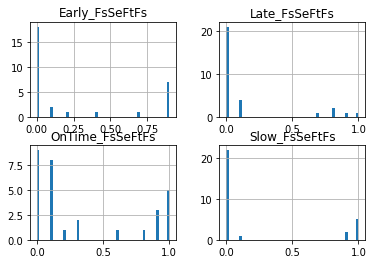

In [584]:
# df[df.columns[1]].hist(bins=50)
df2 = df.drop(['correct', 'predicted', 'actual'], axis=1)
df2.hist(bins=50)
plt.show()

# Plotting
Plot all motion data by quaternion.
Allows for a visual comparision of how close the motions are.

In [585]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

In [586]:
def getMultiMotions(X, qtName, motionName):
    '''qt is the name of the quaternion (e.g. 'quat_w'). motionName is the name of the motion (e.g. 'Curl_90degree'). 
    Should match the names of the indices of df X.
    Returns a df with multiple time-series of the quaternion of the motion type'''
    
    df = X.xs(qtName, level='qt', axis=1)\
        .xs(motionName, level='motion', axis=0)\
        .reset_index()\
        .drop(['dataName'], axis = 1)
    return df

In [587]:
def plotMotion2D(X, motionNames):
    numMotions = len(motionNames)
    fig, axes = plt.subplots(nrows=numMotions, ncols=4, figsize=(20, numMotions*4))
#     fig.suptitle(motionName, fontsize=20)
    for motionIdx in range(0,numMotions):
        motionName = motionNames[motionIdx]
        for qtIdx in range(0,4):
            axes[motionIdx][qtIdx].set_autoscaley_on(False)
            axes[motionIdx][qtIdx].set_ylim([-1,1])
        
        axes[motionIdx][0].set_ylabel(motionName)
        axes[motionIdx][0].set_title('w')
        axes[motionIdx][1].set_title('x')
        axes[motionIdx][2].set_title('y')
        axes[motionIdx][3].set_title('z')
        axes[motionIdx][0].plot(getMultiMotions(X, 'quat_w', motionName).T)
        axes[motionIdx][1].plot(getMultiMotions(X, 'quat_x', motionName).T)
        axes[motionIdx][2].plot(getMultiMotions(X, 'quat_y', motionName).T)
        axes[motionIdx][3].plot(getMultiMotions(X, 'quat_z', motionName).T)
    return fig

In [588]:
motionNames = X.index.levels[0].tolist()
motionNames

['Early_FsSeFtFs', 'Late_FsSeFtFs', 'OnTime_FsSeFtFs', 'Slow_FsSeFtFs']

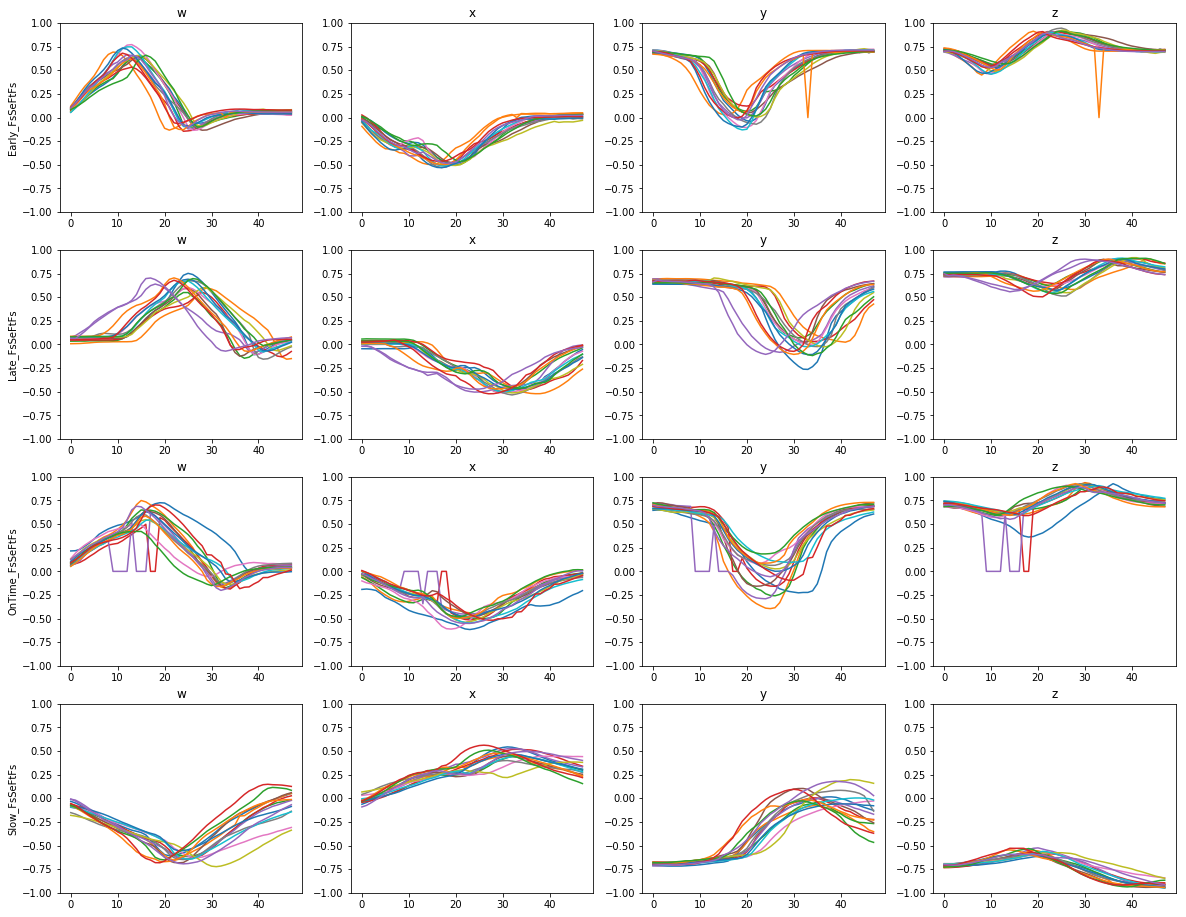

In [589]:
plotMotion2D(X, motionNames)
plt.savefig('Handoid-Motions-'+dataName+'.png')
plt.show()